# Analyses of the energy consumption data of the competition "Power Laws: Cold Start Energy Forecasting"
see https://www.drivendata.org/competitions/55/schneider-cold-start/page/111/

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
data= pd.read_csv('../data/consumption_train.csv')
data.tail(10)

,Unnamed: 0,series_id,timestamp,consumption,temperature
509366,509366,103582,2017-12-18 14:00:00,105535.108342,NaN
509367,509367,103582,2017-12-18 15:00:00,104382.156343,NaN
509368,509368,103582,2017-12-18 16:00:00,105153.928293,NaN
509369,509369,103582,2017-12-18 17:00:00,106612.765517,NaN
509370,509370,103582,2017-12-18 18:00:00,98998.576393,NaN
509371,509371,103582,2017-12-18 19:00:00,99445.639414,NaN
509372,509372,103582,2017-12-18 20:00:00,11604.814821,NaN
509373,509373,103582,2017-12-18 21:00:00,10823.631017,NaN
509374,509374,103582,2017-12-18 22:00:00,10273.037613,NaN
509375,509375,103582,2017-12-18 23:00:00,8993.025597,NaN


In [55]:
print(data['series_id'].nunique()) # 758
#print(set(data['series_id']))

758


In [48]:
example = data.loc[data['series_id'] == 102626,'consumption']

In [49]:
example.index = data.loc[data['series_id'] == 102626,'timestamp']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

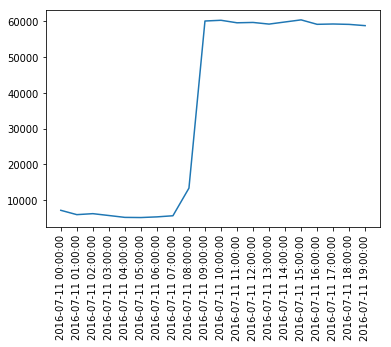

In [62]:
plt.plot(example[0:20])
plt.xticks(rotation='vertical')

In [51]:
# estimating parameters from data
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(example, order = (10,0))
result = mod.fit()
print(result.summary())

C:\Users\Hanna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:            consumption   No. Observations:                  672
Model:                    ARMA(10, 0)   Log Likelihood               -7189.251
Method:                       css-mle   S.D. of innovations          10678.481
Date:                Mon, 05 Nov 2018   AIC                          14402.502
Time:                        22:08:23   BIC                          14456.626
Sample:                    07-11-2016   HQIC                         14423.464
                         - 08-07-2016                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.345e+04    644.554     51.903      0.000    3.22e+04    3.47e+04
ar.L1.consumption      0.7676      0.036     21.442      0.000       0.697       0.838
ar.L2.consumption   

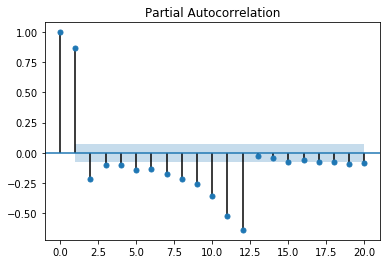

In [52]:
# Using PACF to estimate the order of a model
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF for AR(1)
plot_pacf(example, lags=20)
plt.show()

In [53]:
len(example)

672

C:\Users\Hanna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


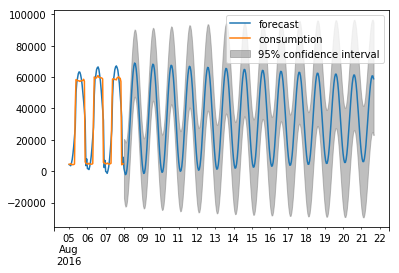

In [54]:
mod = ARMA(example,order=(3,3))
result = mod.fit()
result.plot_predict(start=600, end=1000)
plt.show()